#### 本notebookは『データサイエンスの無駄遣い』（[著]篠田裕之, 翔泳社, 2021）のサンプルコードとなります。

## chapter9：全ての孤独に悟りとデータサイエンスで⽴ち向かう

### 実行検証環境

・Python (3.9.2)

・matplotlib (3.4.1)<br>
・seaborn (0.11.1)<br>
・pandas (1.2.4)<br>
・beautifulsoup4 (4.9.3)<br>
・lightgbm (3.2.1)<br>

### 事前準備

・本書の手順に応じて./gps_dataフォルダにfitbitで取得したgps移動データ(tcxファイル)を保存しておく。<br>
・本書の手順に応じて./dataフォルダに各種センサ・ソースから取得した全データを統合したファイルを保存しておく。<br>

### パッケージのインポート

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
import bs4
import pandas as pd
import glob 

### データ取得・前処理

#### fitbitデータの前処理

※GitHub(https://github.com/mirandora/ds_book/tree/main/9_1) に公開しているtcxデータはコード動作確認用の一部のデータとなります。

In [3]:
gps_files = sorted(glob.glob("./gps_data/*.tcx"))

In [4]:
gps_files

['./gps_data/walk_01.tcx', './gps_data/walk_02.tcx', './gps_data/walk_03.tcx']

In [5]:
data_list = []

for gps_file in gps_files:
    tmp_soup = bs4.BeautifulSoup(open(gps_file), 'html.parser')
    
    time_list = tmp_soup.find_all('time')
    lat_list = tmp_soup.find_all('latitudedegrees')
    longi_list = tmp_soup.find_all('longitudedegrees')
    alti_list = tmp_soup.find_all('altitudemeters')
        
    for i in range(len(time_list)):
        data_list.append([time_list[i].text, lat_list[i].text, longi_list[i].text, alti_list[i].text])         

In [6]:
data_df = pd.DataFrame(data_list)
data_df.columns = ["timestamp","latitude","longitude","altitude"]
data_df.to_csv("./data/gps_all.csv",index=False)

In [7]:
data_df

,timestamp,latitude,longitude,altitude
0,2017-05-01T09:05:50.000+09:00,34.15899896621704,134.50285136699677,24.43
1,2017-05-01T09:05:51.000+09:00,34.15899896621704,134.50285136699677,24.43
2,2017-05-01T09:05:52.000+09:00,34.15899896621704,134.50285136699677,22.23
3,2017-05-01T09:05:53.000+09:00,34.15899181365967,134.50283288955688,25.26
4,2017-05-01T09:05:54.000+09:00,34.15898132324219,134.50284361839294,25.23
...,...,...,...,...
5638,2017-05-01T11:09:41.000+09:00,34.15107274055481,134.4305785894394,66.2
5639,2017-05-01T11:09:42.000+09:00,34.151084661483765,134.4305831193924,66.25
5640,2017-05-01T11:09:43.000+09:00,34.151098012924194,134.43058788776398,66.29
5641,2017-05-01T11:09:44.000+09:00,34.151113867759705,134.4305934906006,66.23


#### theta、muse、amedas、fitbitの統合データの読み込み

※あらかじめ本書の手順に従ってtheta、muse、amedas、fitbitなどから取得したデータを統合してひとつのcsvファイルとしてまとめておく。<br>
※GitHub(https://github.com/mirandora/ds_book/tree/main/9_1) に公開しているデータはコード動作確認用の統合済みデータとなります。

In [8]:
ohenro_data = pd.read_csv("./data/ohenro_data.csv")

In [9]:
ohenro_data

,temple_no,satori,hour,people,max_temp,min_temp,precipitation,wind,kcal,day_total_kcal,trip_total_kcal,km,day_total_km,trip_total_km
0,1,0.847543,8,18,26.8,13.9,0.0,8.3,0,0,0,0.00,0.00,0.00
1,2,0.878716,9,15,26.8,13.9,0.0,8.3,99,99,99,1.21,1.21,1.21
2,3,0.576629,10,7,26.8,13.9,0.0,8.3,241,340,340,3.00,4.21,4.21
3,4,0.549223,11,8,26.8,13.9,0.0,8.3,397,737,737,4.96,9.17,9.17
4,5,0.864162,11,7,26.8,13.9,0.0,8.3,178,915,915,2.29,11.46,11.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,0.858205,13,3,11.6,3.9,0.0,5.6,3126,2102,7706,42.65,28.64,111.52
60,61,0.870218,9,29,9.0,4.7,0.0,2.8,1719,623,9425,26.60,8.57,138.12
61,62,0.846740,10,1,9.0,4.7,0.0,2.8,159,782,9584,2.67,11.24,140.79
62,63,0.913370,10,2,9.0,4.7,0.0,2.8,194,976,9778,3.05,14.29,143.84


### モデリング

In [ ]:
import lightgbm as lgb

※データ時点数が非常に少ない点に留意。（そのため本書ではデータのプロットによる考察が主となる。）<br>
※本書と実行環境、ハイパーパラメータが異なるためモデルの予測結果および重要度が異なる点に留意。

In [10]:
train_X = ohenro_data.drop(["temple_no","satori"],axis=1)
train_Y = ohenro_data[["satori"]]

In [11]:
X_train = train_X[0:49]
X_valid = train_X[50:]
y_train = train_Y[0:49]
y_valid = train_Y[50:]

In [12]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [13]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234,
    "learning_rate":0.03,    
    "verbose":-1,    
    "num_leaves": 50,
    "min_data_in_leaf": 6,
    "min_sum_hessian_in_leaf": 7        
}

In [14]:
model_lgb = lgb.train(lgbm_params,
    lgb_train,
    valid_sets=lgb_eval,
    num_boost_round=100,
    early_stopping_rounds=10,
    verbose_eval=5
)

Training until validation scores don't improve for 10 rounds
[5]	valid_0's l2: 0.00513094
[10]	valid_0's l2: 0.00510047
[15]	valid_0's l2: 0.00500255
[20]	valid_0's l2: 0.00483104
[25]	valid_0's l2: 0.00465912
[30]	valid_0's l2: 0.00463595
[35]	valid_0's l2: 0.00444921
[40]	valid_0's l2: 0.00450617
[45]	valid_0's l2: 0.00466458
Early stopping, best iteration is:
[36]	valid_0's l2: 0.00442497


In [15]:
y_pred = model_lgb.predict(train_X, num_iteration=model_lgb.best_iteration)

In [16]:
actual_pred_df = train_Y.copy()
actual_pred_df["pred"] = y_pred
actual_pred_df.columns = ["actual","pred"]

<AxesSubplot:>

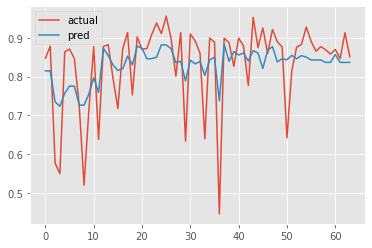

In [17]:
actual_pred_df.plot()

<AxesSubplot:>

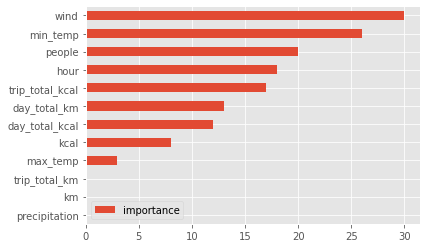

In [18]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending =True)
importance.plot.barh()

### 予測結果と各種データの可視化

In [19]:
temple_num = pd.read_csv("./data/temple_num.csv",encoding="SHIFT-JIS")
temple_num["holiday"] = temple_num["holiday"].astype("int")
temple_num["male"] = temple_num["male"].astype("int")
temple_num["female"] = temple_num["female"].astype("int")

<AxesSubplot:>

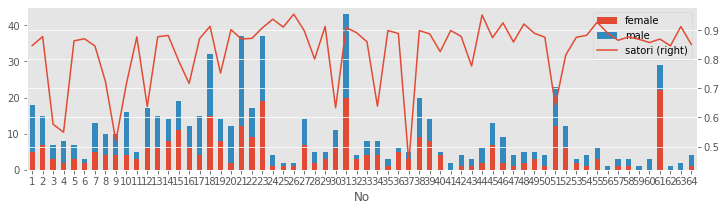

In [20]:
ax = temple_num[["No","female","male"]].plot.bar(x="No",stacked=True, figsize=(12,3))
ohenro_data[["satori"]].plot(secondary_y=["satori"],ax=ax)

<AxesSubplot:>

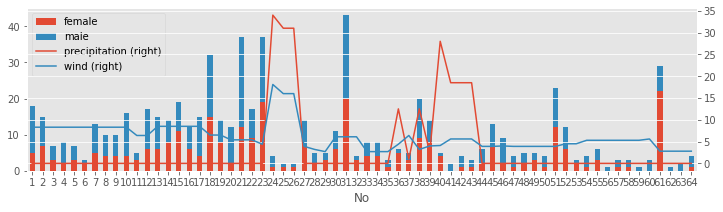

In [21]:
ax = temple_num[["No","female","male"]].plot.bar(x="No",stacked=True, figsize=(12,3))
ohenro_data[["precipitation","wind"]].plot(secondary_y=["precipitation","wind"],ax=ax)

<AxesSubplot:xlabel='hour'>

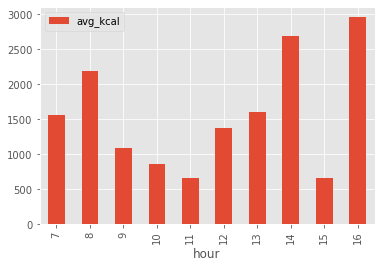

In [22]:
pd.read_csv("./data/hour_kcal.csv").plot.bar(x="hour")

<AxesSubplot:xlabel='kcal', ylabel='satori'>

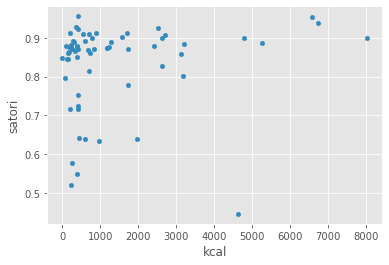

In [23]:
ohenro_data[["satori","kcal"]].plot.scatter(x="kcal",y="satori")